# Bob Bell IPND Data Analysis Project: No-Show Appointments

## Introduction

### Dataset: No-Show Appointments
I decided to work with the no-show appointments dataset available at https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1534697973958000. This dataset refers to 100K medical appointments in Brazil, including data on each patient and appointment as well as whether they showed up to the appointment or not. There are a number of questions I can ask of this dataset. My analysis in this project focuses on two questions, as outlined below.

### Question 1: Which hospital neighborhoods have the greatest percentage of no-shows? Which hospital neighborhoods have the lowest percentage of no-shows?
My first question asks whether the neighborhood of the hospital is predicts propensity for patients to show up to the appointment or not. One could imagine that some hospitals may be out of reach or not easily accessible by public transportation, making it difficult for people to show up to their appointments. The first step is knowing which hospital neighborhoods have the greatest percentage of no-shows

### Question 2: What percentage of people who have some condition (i.e., hypertension, alcoholism, handicap, or diabetes) show vs. no-show?
My second question asks whether people with a condition - defined as having hypertension, alcoholism, handicap or diabetes - are more or less likely to show up for their appointments. One might hyposthesize that people with conditions might be more willing to show-up for their appointments because they have potentially urgent health issues that they want medical consultations for. On the other hand, healthy people (i.e., those without a medical condition) may not show-up at the same rate as those with conditions because they may not have urgent health issues to discuss with the doctor.

## Importing Dataset

In [136]:
# Import pandas module as pd
import pandas as pd

# Print out plots to Jupyter notebook
%pylab inline

# Import required packages for plotting
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [137]:
# Define noshow_url as link referenced in 'Investigate a Dataset - Data Set Options'
# We can pass in URL for read_csv. 
# See here for more info: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url/41880513#41880513
noshow_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'

# Read No-Show Appointments CSV as Pandas DataFrame noshow_df
# Importing dataframe from URL makes code reproducible!
noshow_df = pd.read_csv(noshow_url)

## Investigating, Pre-Processing, and Wrangling Dataset

Let's view the first few elements of the dataframe.

In [138]:
# Examine first few rows of noshow_df dataframe
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's get a description of the values of each column in the dataframe

In [139]:
# I create a for-loop to iterate through all columns of noshow_df, with exception of
# PatientId, AppointmentID, ScheduledDay, and AppointmentDay. These columns have a
# large number of values, and value_counts will not be as meaningful. 

# For each column investigated, I print out the column name, sorted value counts,
# and a dividing line. This helps me to investigate values for each column, and 
# determine if I need to do additional pre-processing before I start analysis.

for column in noshow_df:
    if column not in ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay']:
        print (column)
        print (noshow_df[column].value_counts())
        print ("--------------------------------")

Gender
F    71840
M    38687
Name: Gender, dtype: int64
--------------------------------
Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
--------------------------------
Neighbourhood
JARDIM CAMBURI                

Note that the binary variable Handcap has five values (0, 1, 2, 3, 4) instead of only 2 values (0, 1). Also note that Age has a value of -1.

In [140]:
# Describe each column of noshow_df to identify potential outliers
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1700275f98>]],
      dtype=object)

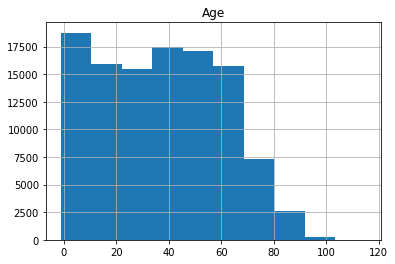

In [141]:
# Here is a histogram of Age to understand the distribution of Age values
noshow_df.hist(column='Age')

* Note that the minimum age is -1; this seems like an error so we should remove this row. 
* The maximum age is 115, which seems a bit much, but let's assume for our analysis that there are centenarians in Brazil (https://www.demographic-research.org/Volumes/Vol20/20/20-20.pdf) who also go to their doctor's visits.
* As seen above in value_counts, the maximum age for Handcap is 4, not 1.

Let's also check if the dataframe has any na values. If so, we will drop corresponding rows.

In [142]:
# Drop all rows with na values
noshow_nona_df = noshow_df.dropna()

In [143]:
# Check that the length of the dataframe is the same as noshow_df
print(len(noshow_nona_df))

110527


Since both dataframes have the same length, let's stick with noshow_df for the rest of the analysis.

Now, let's find the row where age=-1 and remove it. Here is how to find row where column equals some value: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas#17071908

In [144]:
# Identify the row(s) where Age was -1
noshow_df.loc[noshow_df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Here is how to remove the row of a dataframe based on a column value: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value 

In [145]:
# Find all rows of noshow_df where Age is not equal to -1 and assign this subset of rows to noshow_df
noshow_df = noshow_df[noshow_df.Age != -1]

In [146]:
# Find all rows of noshow_df where Handcap is less than or equal to 1 and assign this subset of rows to noshow_df
noshow_df = noshow_df[noshow_df.Handcap <= 1]

In [147]:
# Describe noshow_df to look at values again and see if there are any outliers
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Now we see that the minimum age is 0 (newborn baby) instead of -1. 
* We also see that the max age for Handcap is 1, not 4 as before.

Let's also make sure that the ScheduledDay is not after the AppointmentDay.

In [148]:
# Show any row(s) where ScheduledDay is before or at the same time as AppointmentDay
noshow_df[noshow_df.ScheduledDay <= noshow_df.AppointmentDay]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No


In [149]:
# Print out the number of rows where ScheduledDay is before or at same time as AppointmentDay
print(len(noshow_df[noshow_df.ScheduledDay <= noshow_df.AppointmentDay]))

71837


Only 71837 rows have the date/time of scheduling before or at the same time as the appointment. I will drop rows that do not fit this criteria.

In [150]:
# Find subset of rows in noshow_df where ScheduledDay is before or at same time as AppointmentDay
# Assign this subset of rows to noshow_df
noshow_df = noshow_df[noshow_df.ScheduledDay <= noshow_df.AppointmentDay]

In [151]:
# Verify that resulting number of rows in noshow_df is as expected
print(len(noshow_df))

71837


This resulting dataframe - noshow_df - only has 71837 rows. Now we are ready to do some data analysis.

### Recap on Data Pre-processing and Wrangling

* We removed all rows with invalid values in columns (e.g., where Age was negative or where Handcap > 1)
* We also removed rows where the date/time of scheduling was after the appointment, not before.
* Rationale is that if these observations had such errors, we cannot trust the data for the entire observation.
* However, removing such observations may introduce bias into our analysis. As such, we will restrict our provisional conclusions to the subset of the data for which the data is valid, based on the data dictionary. We will provide a disclaimer that our analyses applied to the entire dataset - with its errors - may lead to different results.

## Question 1: Which hospital neighborhoods have the greatest percentage of no-shows? Which hospital neighborhoods have the lowest percentage of no-shows?

First, let's find out how many appointments happened in each neighborhood. Source: https://stackoverflow.com/questions/12207326/frequency-table-for-a-single-variable. We will create a new Pandas Series num_appt_per_nbd.

In [152]:
# Generate value counts for Neighborhood column and store in pandas series num_appts_per_nbd
num_appts_per_nbd = noshow_df['Neighbourhood'].value_counts()

In [153]:
# Sort num_appts_per_nbd and view to see values
num_appts_per_nbd.sort_values()

ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         5
ILHA DO FRADE                     8
ILHA DO BOI                      23
PONTAL DE CAMBURI                41
MORADA DE CAMBURI                78
SEGURANÇA DO LAR                103
NAZARETH                        108
UNIVERSITÁRIO                   112
HORTO                           114
SANTA HELENA                    126
ENSEADA DO SUÁ                  163
MÁRIO CYPRESTE                  173
ARIOVALDO FAVALESSA             175
ANTÔNIO HONÓRIO                 180
FRADINHOS                       193
DE LOURDES                      220
BOA VISTA                       221
COMDUSA                         237
PIEDADE                         274
SANTA LUÍZA                     280
BARRO VERMELHO                  285
SANTA LÚCIA                     297
DO MOSCOSO                      304
SOLON BORGES                    337
ESTRELINHA                      343
SANTA CECÍLIA                   349
SANTOS REIS                 

Let's do a vectorized operation where if no-show == 'Yes', we set no_show_val = 1, else no_show_val = 0.

Use vectorized operation to create new column (noshow_val) with same initial value (noshow_val=0).

Using apply and lambda functions, we do the following: If No-show == Yes, then set noshow_val to 1, else keep it 0.

In [154]:
# Create new column noshow_val which assigns 1 if No-Show=Yes and 0 otherwise
noshow_df['noshow_val'] = noshow_df['No-show'].apply(lambda x: int(x == 'Yes'))

In [155]:
# Print out first 100 entries of noshow_df to verify if my new column noshow_df works as expected
noshow_df.iloc[0:100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow_val
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,1
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No,0
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No,0
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No,0
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No,0


We can see that our dataframe does what we wanted.

Now let's add up the number of no-shows per neighborhood.

In [156]:
# Add up the number of no-show's per neighborhood and assign to a new pandas series noshow_per_neighborhood
noshow_per_neighborhood = noshow_df.groupby("Neighbourhood").sum()['noshow_val']

In [157]:
# Sort noshow_per_neighborhood and print to see the values
noshow_per_neighborhood.sort_values()

Neighbourhood
AEROPORTO                         1
ILHA DO FRADE                     2
ILHA DO BOI                       2
ILHAS OCEÂNICAS DE TRINDADE       2
PONTAL DE CAMBURI                12
MORADA DE CAMBURI                16
SEGURANÇA DO LAR                 26
NAZARETH                         29
UNIVERSITÁRIO                    31
SANTA HELENA                     35
HORTO                            41
ANTÔNIO HONÓRIO                  43
DE LOURDES                       45
FRADINHOS                        47
MÁRIO CYPRESTE                   47
ENSEADA DO SUÁ                   48
COMDUSA                          55
BOA VISTA                        55
ARIOVALDO FAVALESSA              57
SANTA LUÍZA                      64
SOLON BORGES                     65
SANTA LÚCIA                      76
BARRO VERMELHO                   79
DO CABRAL                        80
PIEDADE                          83
DO MOSCOSO                       87
ESTRELINHA                       90
SANTOS REIS   

Now, let's join the two Pandas Series into a dataframe neighborhood_df.

In [158]:
# Combine two pandas Series (noshow_per_neighborhood and num_appts_per_nbd) 
# and place in pandas dataframe neighborhood_df
neighborhood_df = noshow_per_neighborhood.to_frame().join(num_appts_per_nbd)

In [159]:
# Look at first few entries of neighborhood_df to see if dataframe looks as expected
neighborhood_df.head()

,noshow_val,Neighbourhood
Neighbourhood,,
AEROPORTO,1,5
ANDORINHAS,490,1520
ANTÔNIO HONÓRIO,43,180
ARIOVALDO FAVALESSA,57,175
BARRO VERMELHO,79,285


Now let's create a new column where we get no_show percentage

In [160]:
# Create new column in neighborhood_df noshow_rate which is the result of
# dividing number of no-shows by the total number of appointments
neighborhood_df['noshow_rate'] = neighborhood_df['noshow_val']/neighborhood_df['Neighbourhood']

In [161]:
# Sort neighborhood_df by noshow_rate in descending order and place
# results in neighborhood_highest_df 
neighborhood_highest_df = neighborhood_df.sort_values(by='noshow_rate', ascending = False)

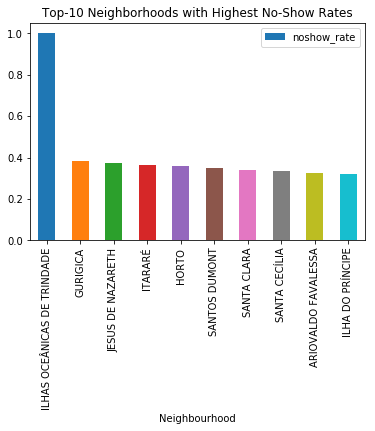

In [162]:
# Generate top 10 neighborhoods for highest no-show rates in a bar plot
neighborhood_highest_df.head(10).plot(y='noshow_rate', kind='bar', title="Top-10 Neighborhoods with Highest No-Show Rates")

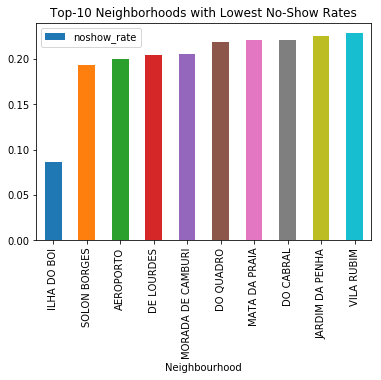

In [163]:
# Generate top 10 neighborhoods for lowest no-show rates in a bar plot
neighborhood_highest_df.sort_values(by='noshow_rate', ascending = True).head(10).plot(y='noshow_rate', kind='bar', title="Top-10 Neighborhoods with Lowest No-Show Rates")

### Conclusion on Question 1 Findings
* We found top 10 locations for highest and lowest no-show rates.
* We don't have causal explanations for why specific locations have certain no-show rates. For ILHAS OCEÂNICAS DE TRINDADE, since it had a small number of appointments in total, it is understandable why its no-show rate would be lage compared to other locations. However, this all requires more investigation.
* Note that this analysis could change if we included the observations with error-prone data (e.g., Handcap = {2, 3, 4}) or where ScheduledDay occurs after AppointmentDay.

## Question 2: What percentage of people who have some condition (i.e., hypertension, alcoholism, handicap, or diabetes) show vs. no-show?

First, let's start with some exploratory analyses on each variable and how many people show up vs. not within each condition.

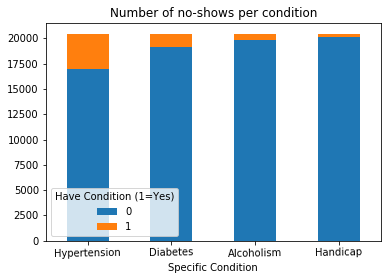

In [164]:
# I add the number of no-shows for those with vs. without a condition and store in Pandas Series
# Each pandas Series is named: noshow_per_[condition_name]
noshow_per_hypertension = noshow_df.groupby("Hipertension").sum()['noshow_val']
noshow_per_diabetes = noshow_df.groupby("Diabetes").sum()['noshow_val']
noshow_per_alcoholism = noshow_df.groupby("Alcoholism").sum()['noshow_val']
noshow_per_handicap = noshow_df.groupby("Handcap").sum()['noshow_val']

# I concatenate pandas Series into dataframe sub_df
sub_df = pd.concat([noshow_per_hypertension, noshow_per_diabetes, noshow_per_alcoholism, noshow_per_handicap], keys=['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'], names=['Specific Condition', 'Have Condition (1=Yes)']).unstack()

# I created stacked bar chart to show the number of no-shows per condition
sub_df.plot(kind='bar', stacked=True, rot=1, title="Number of no-shows per condition")

Let's create new column for people with any condition, similar to what we did above.

Using vectorized operation, we will create a column where if anyone has a condition, they have boolean value of True or False.

In [165]:
# Create new column condition in noshow_df that is True if the patient
# has any condition (Hyptertension, Diabetes, Alcoholism, or Handicap)
noshow_df['condition'] = ((noshow_df['Hipertension'] + noshow_df['Diabetes'] + noshow_df['Alcoholism'] + noshow_df['Handcap']) != 0)

In [166]:
# Print first 100 entries of noshow_df to verify that condition column
# generates values as expected
noshow_df.iloc[0:100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow_val,condition
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0,True
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,False
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,False
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0,False
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0,False
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,1,False
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No,0,False
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No,0,False
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No,0,False
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No,0,False


And here is a plot of people with and without a condition who show up to their appointments.

In [167]:
# Create pandas Series num_appts_per_condition that
# is generated by value counts of noshow_df condition column
num_appts_per_condition = noshow_df['condition'].value_counts()

Now we have list of the appointments per condition type.

In [168]:
# Print out num_appts_per_condition Series to verify its contents
print(num_appts_per_condition)

False    54299
True     17538
Name: condition, dtype: int64


Similar to above, we will count the number of noshow's per condition type. Since this fits into one line, it is not useful to create a function for this.

In [169]:
# Create new pandas Series noshow_per_condition that adds up
# all no-show's per condition value (True vs. False)
noshow_per_condition = noshow_df.groupby("condition").sum()['noshow_val']

Now let's see our results.

In [170]:
# Print out noshow_per_condition to verify its contents
print(noshow_per_condition)

condition
False    16146
True      4339
Name: noshow_val, dtype: int64


Now, let's join both Pandas Series into a dataframe condition_df

In [171]:
# Combine pandas Series noshow_per_condition and num_appts_per_condition
# and place them in a dataframe condition_df
condition_df = noshow_per_condition.to_frame().join(num_appts_per_condition)

And let's view the dataframe

In [172]:
# Print out the condition_df data frame to view its contents
print(condition_df)

           noshow_val  condition
condition                       
False           16146      54299
True             4339      17538


As above, we will create new column for noshow rate and sort in descending order. Since these lines are short, it doesn't make sense to write a function.

In [173]:
# Create new column noshow_rate which is the result of dividing
# number of no-shows by number of appointments for each condition type (True, False)
condition_df['noshow_rate'] = condition_df['noshow_val']/condition_df['condition'] 

# Print out condition_df in descending order or no-show rates
print(condition_df.sort_values(by='noshow_rate', ascending = False))

           noshow_val  condition  noshow_rate
condition                                    
False           16146      54299     0.297354
True             4339      17538     0.247406


Finally, let's plot the results as a bar graph. 

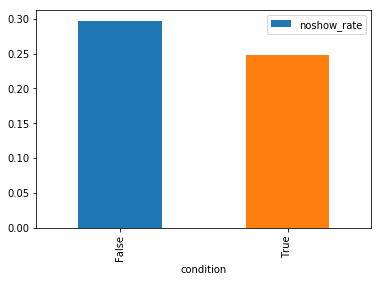

In [174]:
# Generate bar plot showing noshow_rate on y-axis
condition_df.plot(y='noshow_rate', kind='bar')

### Conclusion on Question 2 Findings
* Interestingly, the people with a condition actually show up at a higher rate than those without a condition. 
* One limitation of this analysis is that we do not investigate whether the differences in the two groups (condition vs. no condition) are statistically significant. The differences could be by chance. And  the pre-processing and data wrangling we conducted in the beginning of this analysis could have skewed the no-show rates in a way that is not representative of the true population of this dataset. 
* We don't have causal explanations for why people with conditions show up at higher rate than those without a condition. This might mean that people with some condition are less likely to miss their visits. However, this would require more investigation beyond the scope of this course.
* One possible investigation is to see if any specific condition is more likely to lead to no-show appointments. Using techniques in observational causal inference, I could match on all observations where the only difference in covariates is that one group has a specific condition whereas the other group does not have the condition. Then we could see if there is a statistically significant difference in no-show rates. This however would require that we assume no other covariates influence the variable no-show.
* Note that this analysis about the differences in no-show rates based on condition could change if we included the observations with error-prone data (e.g., Handcap = {2, 3, 4}) or where ScheduledDay occurs after AppointmentDay.